# Lathe Linear Regression
Lathe now has Linear Regression! We can officially train up a Linear Regression model, and I'm super excited to do so! We're going to start with some random, scaled data. The scalar (slope) for this data is 250, y = 250x + b. Then we're going to move onto some real-world data, to show just how powerful Lathe 0.0.1 can be!

In [56]:
# Reading in our data -->
using CSV
import DataFrames
traindf = CSV.read("train_data")
testdf = CSV.read("test_data")

,Column1,Price,Doors
,Int64,Int64,Int64
1,0,1250,5
2,1,2500,10
3,2,3000,12
4,3,3000,12
5,4,11250,45
6,5,20000,80
7,6,6750,27
8,7,12000,48
9,8,7250,29


# Getting a baseline

In [57]:
# This data is pre-split, namely due to Lathe 0.0.1 not having DataFrame support.
#     We will use the Test train split feature later in the notebook,
# I will explain the short-comings, and compromises then.
#     For now, however, we are going to go ahead and get a baseline MAE
using Lathe: models
# Ignore these unresolved deps (for now)

In [58]:
# Our y is going to be Price,
#    Our x is going to be Doors:
# Fitting our model:
model = models.meanBaseline(traindf.Price)

Lathe.models.meanBaseline(Int64[1500, 12000, 24500, 31250, 75500, 6750, 8000, 184500, 87500, 96000, 98000, 31250, 123750, 218000, 26000])

In [59]:
# Put our model, and our xtrain into our predict method
testdf.Baseline = models.predict(model,testdf.Doors)

-Lathe.models Mean Baseline-mean: 68300.0

23-element Array{Any,1}:
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0
 68300.0

In [60]:
# Our data has a mean of 68,300 dollars for our Y
#     Let's see how guessing that each time stacks up:
using Lathe: Validate

In [61]:
accuracy = Validate.mae(testdf.Price,testdf.Baseline)
println("Baseline accuracy: ",accuracy)

Baseline accuracy: -41321.739130434784


# Fitting Lathe Simple Linear Regression

In [62]:
# Fitting our model:
linreg = models.SimpleLinearRegression(traindf.Doors,traindf.Price)

Lathe.models.SimpleLinearRegression(Int64[6, 48, 98, 125, 302, 27, 32, 738, 350, 384, 392, 125, 495, 872, 104], Int64[1500, 12000, 24500, 31250, 75500, 6750, 8000, 184500, 87500, 96000, 98000, 31250, 123750, 218000, 26000])

In [63]:
# Put our x and y into the predict method:
testdf.Prediction = models.predict(linreg,testdf.Doors)

23-element Array{Any,1}:
   1250.0
   2500.0
   3000.0
   3000.0
  11250.0
  20000.0
   6750.0
  12000.0
   7250.0
  98500.0
   3500.0
    750.0
  12250.0
   7000.0
   1500.0
  12000.0
  24500.0
  31250.0
  75500.0
   6750.0
   8000.0
 184500.0
  87500.0

In [64]:
# Now our dataframe looks something like this:
testdf

,Column1,Price,Doors,Baseline,Prediction
,Int64,Int64,Int64,Any,Any
1,0,1250,5,68300.0,1250.0
2,1,2500,10,68300.0,2500.0
3,2,3000,12,68300.0,3000.0
4,3,3000,12,68300.0,3000.0
5,4,11250,45,68300.0,11250.0
6,5,20000,80,68300.0,20000.0
7,6,6750,27,68300.0,6750.0
8,7,12000,48,68300.0,12000.0
9,8,7250,29,68300.0,7250.0


In [65]:
# Now we can validate our DataFrame:
linaccuracy = Validate.mae(testdf.Price,testdf.Prediction)
println("Linear Regression Accuracy: ",linaccuracy)

Linear Regression Accuracy: 0.0


**You may be wondering: " 0 mae? How is that possible??"** \
As I stated earlier, this data is random, and scaled, not real-world, a way to remedy this if you wish to have a truly good test I suppose is to have a random number generated whilst iterating the scalar, and have it be a b addition to the scaled variable. Regardless, that's not what I came here to do, and I figured scraping some real data from the web would be more in-line with a realism use-case. The good news is the model can lock onto our slope and identify it for us.

In [66]:
# Quick plot of original data, train data, the baseline, and the model:
using Plots

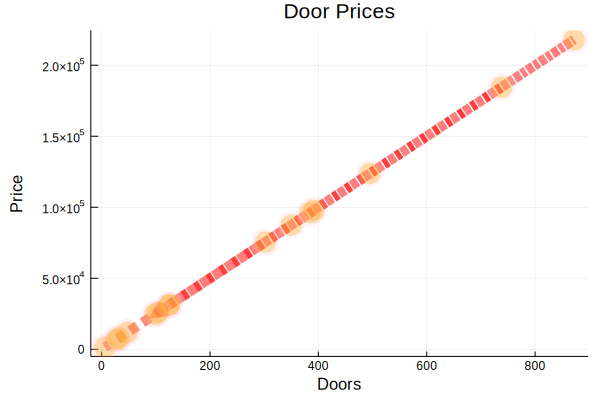

In [67]:
plot(traindf.Doors,traindf.Price, markershape = :circle,
    markersize = 12,
    markeralpha = 0.3,
    markercolor = :orange,
    markerstrokewidth = 3,
    linestyle = :dot,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 10,
    linecolor = :red,
    markerstrokealpha = 0.2,
    markerstrokecolor = :pink,
    title = "Door Prices",
    ylabel = "Price",
    xlabel = "Doors")

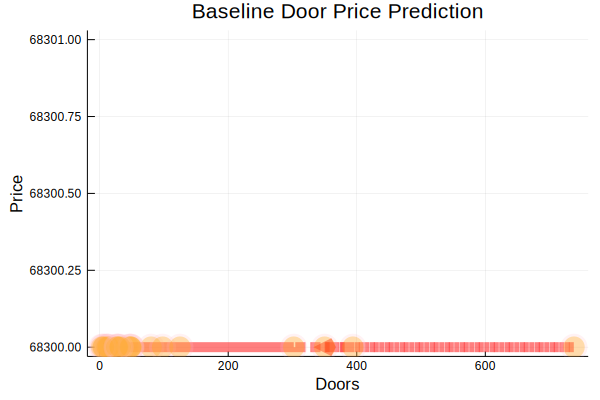

In [68]:
plot(testdf.Doors,testdf.Baseline, markershape = :circle,
    markersize = 12,
    markeralpha = 0.3,
    markercolor = :orange,
    markerstrokewidth = 3,
    linestyle = :dot,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 10,
    linecolor = :red,
    markerstrokealpha = 0.2,
    markerstrokecolor = :pink,
    title = "Baseline Door Price Prediction",
    ylabel = "Price",
    xlabel = "Doors")

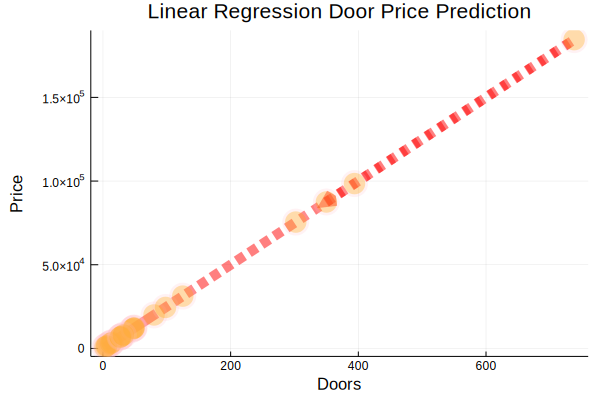

In [69]:
plot(testdf.Doors,testdf.Prediction, markershape = :circle,
    markersize = 12,
    markeralpha = 0.3,
    markercolor = :orange,
    markerstrokewidth = 3,
    linestyle = :dot,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 10,
    linecolor = :red,
    markerstrokealpha = 0.2,
    markerstrokecolor = :pink,
    title = "Linear Regression Door Price Prediction",
    ylabel = "Price",
    xlabel = "Doors")

# Now it's time for some real-world data to test this model on!
Of course, putting a model through this is useless if we can't find some real-world data to apply it to. So I've decided to take a look at some real world data, fit the model, and see how it fares. Unfortunately, I couldn't find any great simple regression datasets that would work well for this example without a bunch of engineering, and although I might do some examples with data like that in the future, [this pre-splitted kaggle set](https://www.kaggle.com/alphaepsilon/housing-prices-dataset/download) seemed pretty optimal to do this job.

In [70]:
df = CSV.read("train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour
,Int64,Int64,String,String,Int64,String,String,String,String
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl
7,7,20,RL,75,10084,Pave,NA,Reg,Lvl
8,8,60,RL,NA,10382,Pave,NA,IR1,Lvl
9,9,50,RM,51,6120,Pave,NA,Reg,Lvl


In [71]:
testdf = CSV.read("train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour
,Int64,Int64,String,String,Int64,String,String,String,String
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl
7,7,20,RL,75,10084,Pave,NA,Reg,Lvl
8,8,60,RL,NA,10382,Pave,NA,IR1,Lvl
9,9,50,RM,51,6120,Pave,NA,Reg,Lvl


In [72]:
# Firstly let's get a better look at what we got goin
#     on here.
show(df,allcols=true)

1460×81 DataFrame
│ Row  │ Id    │ MSSubClass │ MSZoning │ LotFrontage │ LotArea │ Street │
│      │ Int64 │ Int64      │ String   │ String      │ Int64   │ String │
├──────┼───────┼────────────┼──────────┼─────────────┼─────────┼────────┤
│ 1    │ 1     │ 60         │ RL       │ 65          │ 8450    │ Pave   │
│ 2    │ 2     │ 20         │ RL       │ 80          │ 9600    │ Pave   │
│ 3    │ 3     │ 60         │ RL       │ 68          │ 11250   │ Pave   │
│ 4    │ 4     │ 70         │ RL       │ 60          │ 9550    │ Pave   │
│ 5    │ 5     │ 60         │ RL       │ 84          │ 14260   │ Pave   │
│ 6    │ 6     │ 50         │ RL       │ 85          │ 14115   │ Pave   │
│ 7    │ 7     │ 20         │ RL       │ 75          │ 10084   │ Pave   │
│ 8    │ 8     │ 60         │ RL       │ NA          │ 10382   │ Pave   │
│ 9    │ 9     │ 50         │ RM       │ 51          │ 6120    │ Pave   │
│ 10   │ 10    │ 190        │ RL       │ 50          │ 7420    │ Pave   │
⋮
│ 1450 │ 1450  │ 1

│ 1454 │ SBrkr      │ 1140     │ 0        │ 0            │ 1140      │
│ 1455 │ SBrkr      │ 1221     │ 0        │ 0            │ 1221      │
│ 1456 │ SBrkr      │ 953      │ 694      │ 0            │ 1647      │
│ 1457 │ SBrkr      │ 2073     │ 0        │ 0            │ 2073      │
│ 1458 │ SBrkr      │ 1188     │ 1152     │ 0            │ 2340      │
│ 1459 │ FuseA      │ 1078     │ 0        │ 0            │ 1078      │
│ 1460 │ SBrkr      │ 1256     │ 0        │ 0            │ 1256      │

│ Row  │ BsmtFullBath │ BsmtHalfBath │ FullBath │ HalfBath │ BedroomAbvGr │
│      │ Int64        │ Int64        │ Int64    │ Int64    │ Int64        │
├──────┼──────────────┼──────────────┼──────────┼──────────┼──────────────┤
│ 1    │ 1            │ 0            │ 2        │ 1        │ 3            │
│ 2    │ 0            │ 1            │ 2        │ 0        │ 3            │
│ 3    │ 1            │ 0            │ 2        │ 1        │ 3            │
│ 4    │ 1            │ 0            │ 1      

In [73]:
# Of course, since this is single-feature linear regression,
#     We only need 2 features, an x and a target.
df = DataFrame(:LotArea => df.LotArea, :SalePrice => df.SalePrice, 
    :YearBuilt => df.YearBuilt,:YearSold => df.YrSold, :Rooms => df.TotRmsAbvGrd)

,LotArea,SalePrice,YearBuilt,YearSold,Rooms
,Int64,Int64,Int64,Int64,Int64
1,8450,208500,2003,2008,8
2,9600,181500,1976,2007,6
3,11250,223500,2001,2008,6
4,9550,140000,1915,2006,7
5,14260,250000,2000,2008,9
6,14115,143000,1993,2009,5
7,10084,307000,2004,2007,7
8,10382,200000,1973,2009,7
9,6120,129900,1931,2008,8


In [74]:
# There we go, easy enough.
#     Let's look at the data itself
println("Lot Area Max: ", maximum(df.LotArea))
println("Lot Area Min: ", minimum(df.LotArea))

Lot Area Max: 215245
Lot Area Min: 1300


In [75]:
using Lathe: stats
println(stats.mean(df.LotArea))
println(stats.mean(df.SalePrice))
println(stats.mean(df.YearBuilt))
println(stats.mean(df.Rooms))

10516.828082191782
180921.19589041095
1971.267808219178
6.517808219178082


In [76]:
# We have to do the same with the traindf of course, also:
testdf = DataFrame(:LotArea => testdf.LotArea, :SalePrice => testdf.SalePrice, 
    :YearBuilt => testdf.YearBuilt,:YearSold => testdf.YrSold, :Rooms => testdf.TotRmsAbvGrd)

,LotArea,SalePrice,YearBuilt,YearSold,Rooms
,Int64,Int64,Int64,Int64,Int64
1,8450,208500,2003,2008,8
2,9600,181500,1976,2007,6
3,11250,223500,2001,2008,6
4,9550,140000,1915,2006,7
5,14260,250000,2000,2008,9
6,14115,143000,1993,2009,5
7,10084,307000,2004,2007,7
8,10382,200000,1973,2009,7
9,6120,129900,1931,2008,8


In [77]:
# Of course, we need to find and destroy
#    Our null values!
function spot_missing(array)
    total = 0
    for i in array
        if i == "missing"
            total = total + 1
        end
    end
    return(total)
end

spot_missing (generic function with 1 method)

In [78]:
spot_missing(df.LotArea)

0

In [79]:
spot_missing(df.SalePrice)

0

In [80]:
spot_missing(df.YearBuilt)

0

In [81]:
spot_missing(df.YearSold)

0

In [82]:
spot_missing(df.Rooms)

0

# Visual Exploration
One thing I like to emphasize in data-science is how hard it can be to truly understand your data without visualizing it. Yes, T tests can be compelling and tell you a lot, but I like to make rudementary visualizations to "sum up" my data, before going in for the T tests, to get an idea of **what to T test for.** This is especially useful with a lack of domain knowledge on the subject you are analyzing.

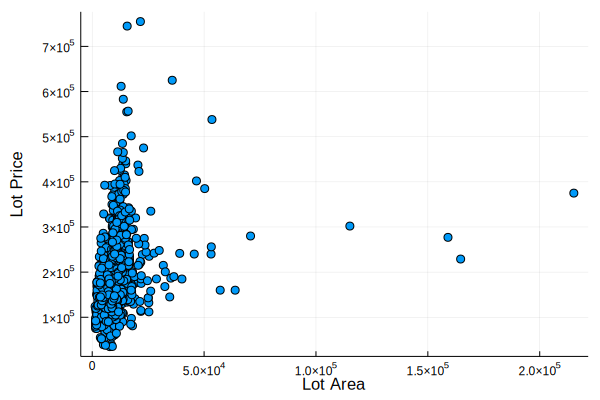

In [83]:
scatter(df.LotArea,df.SalePrice,xlabel = "Lot Area", ylabel = "Lot Price")

In [84]:
# What this tells me is there is a strong linear correlation between
#     Lot area and Sale Price in this dataset.

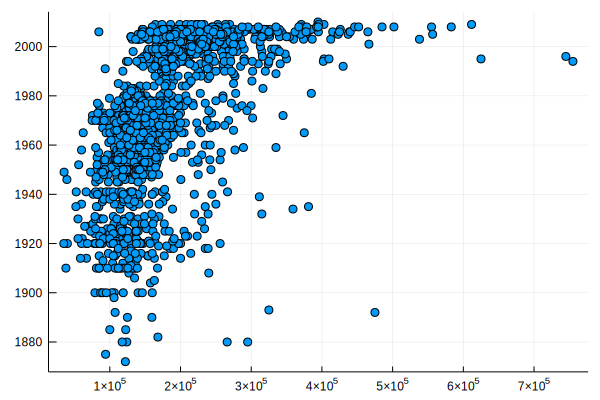

In [85]:
scatter(df.SalePrice,df.YearBuilt)

# Baseline

In [86]:
# Fit our model once again:
using Lathe: models
model = models.meanBaseline(df.SalePrice)

Lathe.models.meanBaseline(Int64[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000  …  136000, 287090, 145000, 84500, 185000, 175000, 210000, 266500, 142125, 147500])

In [87]:
# we'll have a new dataframe for our predictions
using DataFrames
predictions = DataFrame()

""
""


In [88]:
predictions.Baseline = models.predict(model,testdf.SalePrice)

-Lathe.models Mean Baseline-mean: 180921.19589041095

1460-element Array{Any,1}:
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
      ⋮            
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095
 180921.19589041095

# Validating Baseline

In [89]:
using Lathe: Validate
baseline_accuracy = Validate.mae(testdf.SalePrice,predictions.Baseline)
println("==========>")
println("Baseline Accuracy - ",baseline_accuracy)
println("==========>")

==========>
Baseline Accuracy - 1.9455711319021984e-11
==========>


In [90]:
# Wow that's innaccurate!
#     That get's me excited for the validation of this model!

# Model

In [91]:
# Fit our new model!
model = models.SimpleLinearRegression(testdf.LotArea,testdf.SalePrice)

Lathe.models.SimpleLinearRegression(Int64[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420  …  9000, 9262, 3675, 17217, 7500, 7917, 13175, 9042, 9717, 9937], Int64[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000  …  136000, 287090, 145000, 84500, 185000, 175000, 210000, 266500, 142125, 147500])

In [92]:
# And we'll check out what that looks like:
predictions.Prediction = models.predict(model,testdf.LotArea)

1460-element Array{Any,1}:
   2732.632566151946 
   5147.600310615771 
   8612.554030933434 
   5042.60171303039  
  14933.469605573535 
  14628.973672575923 
   6163.986735242286 
   6789.7783768511745
  -2160.302081326936 
    569.6614558930414
   8507.555433348052 
  10027.93512638441  
  12220.305843967219 
      ⋮              
   9698.239529966302 
 -11792.873423810037 
   3887.617139591168 
   4437.809790938578 
  -7294.7335032522   
  21143.086666773124 
    737.6592120296555
   1613.3475158917554
  12655.000037970707 
   3975.8159615628883
   5393.29702896557  
   5855.290858341259 

In [93]:
BasePredAccuracy = Validate.mae(testdf.SalePrice,predictions.Prediction)
println("=========>")
println("Baseline Accuracy: ",baseline_accuracy)
println("-------------------")
println("Model Accuracy: ",BasePredAccuracy)
println("=========>")

=========>
Baseline Accuracy: 1.9455711319021984e-11
-------------------
Model Accuracy: 173848.28232265453
=========>


Obviously, that is a lot better. **A LOT Better.** \
But maybe we can do one better? We'll see.

# Preprocessing

In [94]:
using Lathe: preprocess

In [95]:
testdf

,LotArea,SalePrice,YearBuilt,YearSold,Rooms
,Int64,Int64,Int64,Int64,Int64
1,8450,208500,2003,2008,8
2,9600,181500,1976,2007,6
3,11250,223500,2001,2008,6
4,9550,140000,1915,2006,7
5,14260,250000,2000,2008,9
6,14115,143000,1993,2009,5
7,10084,307000,2004,2007,7
8,10382,200000,1973,2009,7
9,6120,129900,1931,2008,8


In [96]:
# Let's standardly scale our data!
#    Lathe is going to offer more options,
# Such as unit-l scale, and Arbritrary Rescaling.
#    But for now, though functional, we have the
# Minimilist setup.
testdf.LotAreaScaled = preprocess.Rescalar(testdf.LotArea)
df.LotAreaScaled = preprocess.Rescalar(df.LotArea)

1460-element Array{Any,1}:
 0.03341980415527355 
 0.038795017411016854
 0.04650727990838767 
 0.0385613124868541  
 0.06057631634298535 
 0.059898572062913366
 0.04105728107691229 
 0.04245016242492229 
 0.022529154689289302
 0.028605482717520857
 0.046273574984224915
 0.04965762228610157 
 0.05453738110261983 
 ⋮                   
 0.04892378882423053 
 0.001089064946598425
 0.03599055832106383 
 0.03721517212367664 
 0.011100983897730725
 0.07439762555797051 
 0.02897941059618126 
 0.030928509663698613
 0.055504919488653624
 0.036186870457360534
 0.03934188693355769 
 0.0403701885998738  

That felt a little simple, and that's because it was! Let's see if it gives us a boost in accuracy, though!

# Model, Again

In [97]:
# Fitting up our model:
model = models.SimpleLinearRegression(df.LotAreaScaled,df.SalePrice)

Lathe.models.SimpleLinearRegression(Any[0.0334198, 0.038795, 0.0465073, 0.0385613, 0.0605763, 0.0598986, 0.0410573, 0.0424502, 0.0225292, 0.0286055  …  0.0359906, 0.0372152, 0.011101, 0.0743976, 0.0289794, 0.0309285, 0.0555049, 0.0361869, 0.0393419, 0.0403702], Int64[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000  …  136000, 287090, 145000, 84500, 185000, 175000, 210000, 266500, 142125, 147500])

In [98]:
predictions.ScaledPrediction = models.predict(model,testdf.LotAreaScaled)

1460-element Array{Any,1}:
 176580.91488880647
 178995.88263327032
 182460.836353588  
 178890.88403568493
 188781.7519282282 
 188477.25599523057
 180012.26905789686
 180638.06069950573
 171687.98024132755
 174417.94377854755
 182355.83775600264
 183876.21744903902
 186068.58816662183
      ⋮            
 183546.5218526209 
 162055.40889884435
 177735.8994622457 
 178286.09211359313
 166553.54881940223
 194991.36898942784
 174585.94153468416
 175461.62983854627
 186503.28236062534
 177824.0982842174 
 179241.5793516201 
 179703.57318099582

In [99]:
predictions

,Baseline,Prediction,ScaledPrediction
,Any,Any,Any
1,1.80921e5,2732.63,1.76581e5
2,1.80921e5,5147.6,1.78996e5
3,1.80921e5,8612.55,1.82461e5
4,1.80921e5,5042.6,1.78891e5
5,1.80921e5,14933.5,1.88782e5
6,1.80921e5,14629.0,1.88477e5
7,1.80921e5,6163.99,1.80012e5
8,1.80921e5,6789.78,1.80638e5
9,1.80921e5,-2160.3,171688.0


In [100]:
ScaledPredAccuracy = Validate.mae(testdf.SalePrice,predictions.ScaledPrediction)
println("=========>")
println("Baseline Accuracy: ",baseline_accuracy)
println("-------------------")
println("Model Accuracy: ",BasePredAccuracy)
println("-------------------")
println("Scaled X Accuracy: ",ScaledPredAccuracy)
println("=========>")

=========>
Baseline Accuracy: 1.9455711319021984e-11
-------------------
Model Accuracy: 173848.28232265453
-------------------
Scaled X Accuracy: -5.908476265325939e-11
=========>


Perhaps me math is a bit off there, a?

# Changing the X

In [101]:
# First we'll scale the X
testdf.YearScaled = preprocess.Rescalar(testdf.YearBuilt)
df.YearScaled = preprocess.Rescalar(df.YearBuilt)

1460-element Array{Any,1}:
 0.9492753623188406
 0.7536231884057971
 0.9347826086956522
 0.3115942028985507
 0.927536231884058 
 0.8768115942028986
 0.9565217391304348
 0.7318840579710145
 0.427536231884058 
 0.4855072463768116
 0.6739130434782609
 0.9637681159420289
 0.6521739130434783
 ⋮                 
 0.2753623188405797
 0.7101449275362319
 0.7391304347826086
 0.9855072463768116
 0.9637681159420289
 0.9710144927536232
 0.9565217391304348
 0.9202898550724637
 0.7681159420289855
 0.5               
 0.5652173913043478
 0.6739130434782609

In [102]:
# Now we fit our model again
model2 = models.SimpleLinearRegression(df.YearBuilt,df.SalePrice)

Lathe.models.SimpleLinearRegression(Int64[2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939  …  1974, 2008, 2005, 2006, 2004, 1999, 1978, 1941, 1950, 1965], Int64[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000  …  136000, 287090, 145000, 84500, 185000, 175000, 210000, 266500, 142125, 147500])

In [103]:
# And predict!
predictions.YearX = models.predict(model2,testdf.YearBuilt)

1460-element Array{Any,1}:
 224564.81054523867
 187429.7269109427 
 221814.0636093649 
 103531.94536679238
 220438.69014142826
 210811.07586586988
 225940.18401317578
 183303.60650713183
 125537.92085378245
 136540.90859727748
 172300.6187636368 
 227315.55748111242
 168174.4983598264 
      ⋮            
  96655.07802710775
 179177.48610332143
 184678.97997506894
 231441.6778849233 
 227315.55748111242
 228690.93094904954
 225940.18401317578
 219063.31667349115
 190180.47384681646
 139291.65553315124
 151670.01674458338
 172300.6187636368 

In [104]:
# annndd validate
yearXAccuracy = Validate.mae(testdf.SalePrice,predictions.YearX)
println("=========>")
println("Baseline Accuracy: ",baseline_accuracy)
println("-------------------")
println("Model Accuracy: ",BasePredAccuracy)
println("-------------------")
println("Scaled X Accuracy: ",ScaledPredAccuracy)
println("-------------------")
println("Year as X Accuracy: ",yearXAccuracy)
println("=========>")

=========>
Baseline Accuracy: 1.9455711319021984e-11
-------------------
Model Accuracy: 173848.28232265453
-------------------
Scaled X Accuracy: -5.908476265325939e-11
-------------------
Year as X Accuracy: -1.999791966725702e-10
=========>


Let's move onto
# Some visualizations
Man, I love visualizations.

In [105]:
using Plots
# This changes our background colorvv
gr(leg=false, bg=:white)

Plots.GRBackend()

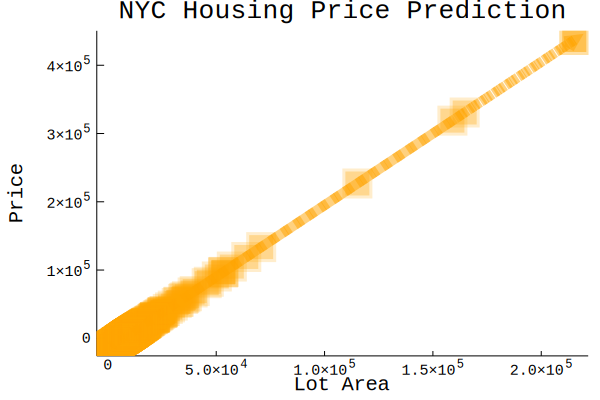

In [106]:
plot(testdf.LotArea,predictions.Prediction, markershape = :square,
    smooth = true,
    markersize = 12,
    markeralpha = 0.3,
    markercolor = :orange,
    markerstrokewidth = 3,
    linestyle = :dot,
    fontfamily = :Courier,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 10,
    linecolor = :orange,
    markerstrokealpha = 0.2,
    markerstrokecolor = :orange,
    title = "NYC Housing Price Prediction",
    ylabel = "Price",
    xlabel = "Lot Area",grid = false)

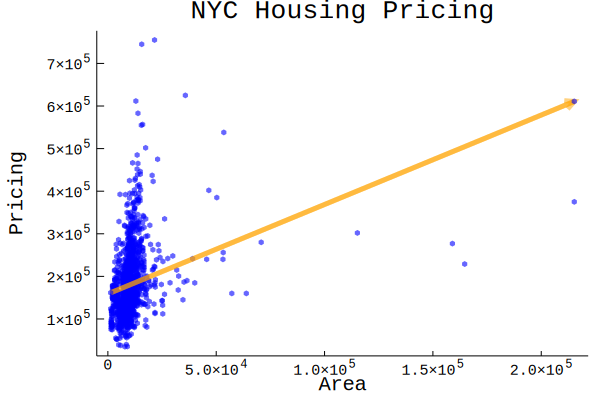

In [107]:
scatter(testdf.LotArea,testdf.SalePrice,smooth = true,
title = "NYC Housing Pricing",arrow = true,
markershape = :hexagon,
    markersize = 3,
    markeralpha = 0.6,
    markercolor = :blue,
    markerstrokewidth = 1,
    markerstrokealpha = 0.0,
    markerstrokecolor = :black,
    linealpha = 0.5,
    linewidth = 5,
    linecolor = :orange,
xlabel = "Area",ylabel = "Pricing",
fontfamily = :Courier,grid = false)

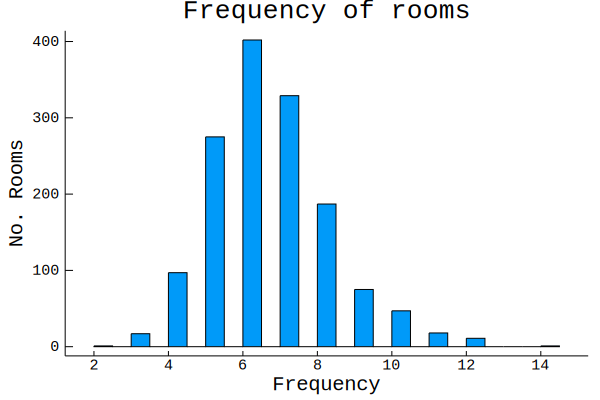

In [108]:
histogram(testdf.Rooms,title = "Frequency of rooms",
xlabel = "Frequency", ylabel = "No. Rooms", fontfamily = :Courier,
    grid = false
)

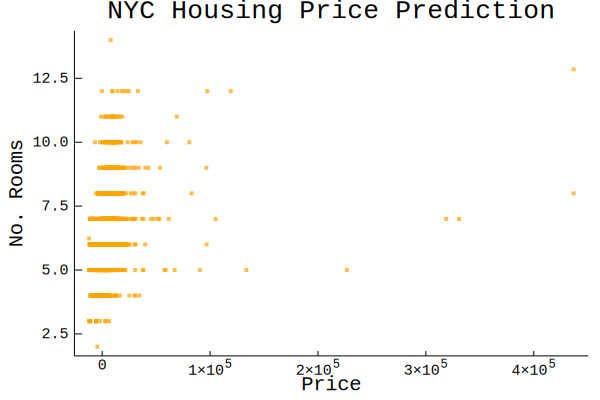

In [109]:
plot(predictions.Prediction,testdf.Rooms, markershape = :square,
    smooth = true,
    markersize = 2,
    markeralpha = .7,
    markercolor = :orange,
    markerstrokewidth = 0,
    linestyle = :dot,
    fontfamily = :Courier,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 0,
    linecolor = :orange,
    markerstrokealpha = 0.2,
    markerstrokecolor = :orange,
    title = "NYC Housing Price Prediction",
    ylabel = "No. Rooms",
    xlabel = "Price",grid = false)

In [110]:
testdf

,LotArea,SalePrice,YearBuilt,YearSold,Rooms,LotAreaScaled,YearScaled
,Int64,Int64,Int64,Int64,Int64,Any,Any
1,8450,208500,2003,2008,8,0.0334198,0.949275
2,9600,181500,1976,2007,6,0.038795,0.753623
3,11250,223500,2001,2008,6,0.0465073,0.934783
4,9550,140000,1915,2006,7,0.0385613,0.311594
5,14260,250000,2000,2008,9,0.0605763,0.927536
6,14115,143000,1993,2009,5,0.0598986,0.876812
7,10084,307000,2004,2007,7,0.0410573,0.956522
8,10382,200000,1973,2009,7,0.0424502,0.731884
9,6120,129900,1931,2008,8,0.0225292,0.427536
